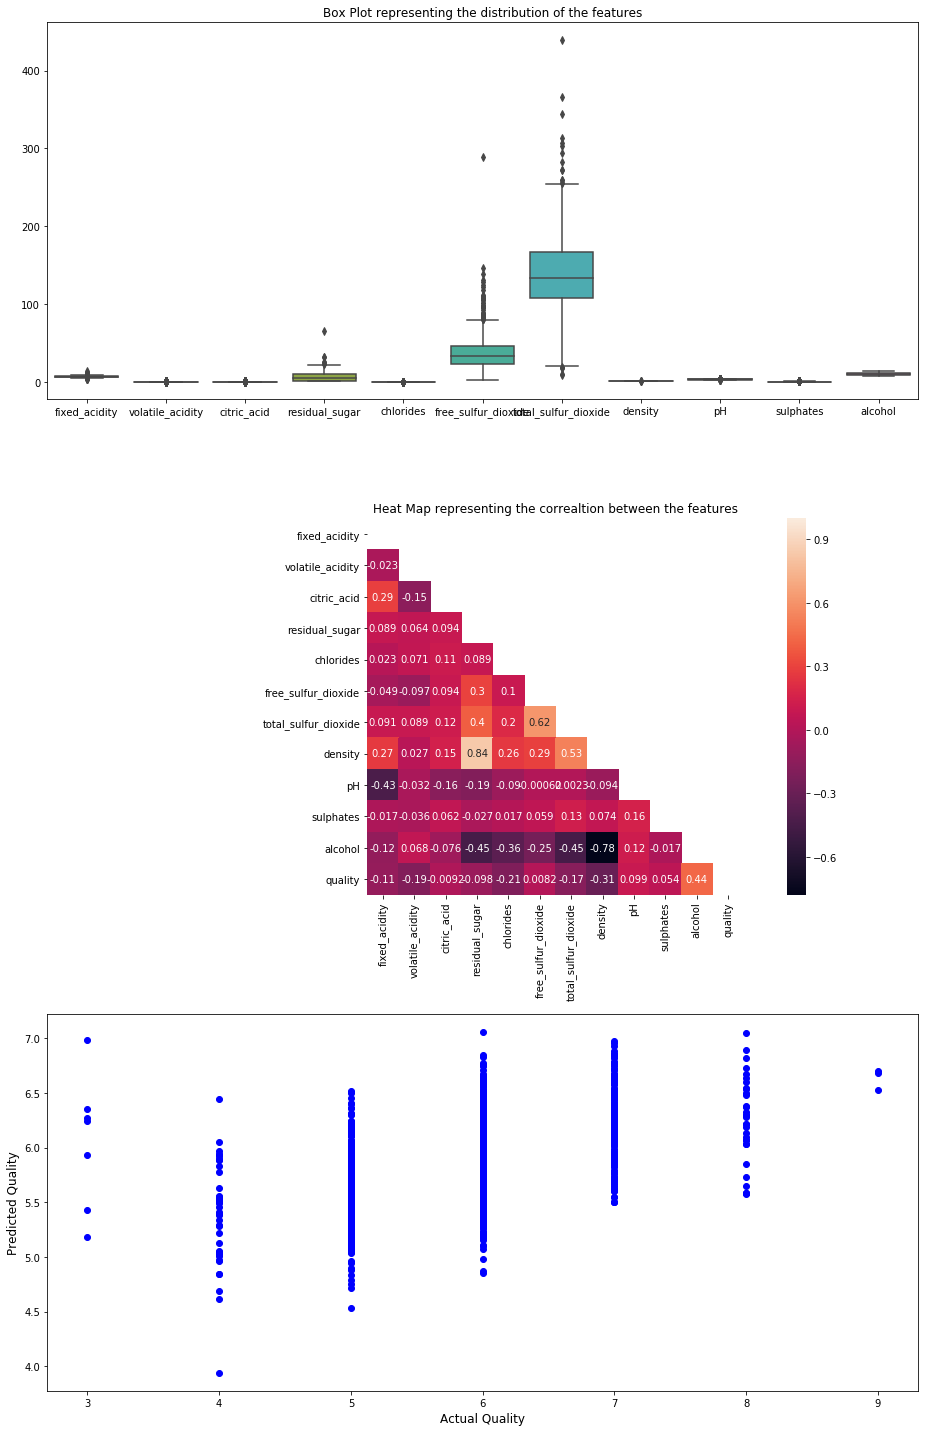

In [5]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

# import the csv
wine_data=pd.read_csv('winequality-white.csv',sep=';')
# clean the headers
wine_data.columns = [col.replace(' ','_') for col in wine_data.columns]

#Box Plot Creation
figure,axes= plt.subplots(nrows=3) #creating an empty plot
figure.set_size_inches(13,20) # set the size in inches
sub_plot_1 = sbn.boxplot(data=wine_data.iloc[:,:-1],orient='v',ax=axes[0]) # plot the box plots next to each other using Seaborn
sub_plot_1.set_title("Box Plot representing the distribution of the features")

#Heat Map Creation
correlation_matrix = wine_data.corr()
mask = np.zeros_like(correlation_matrix) # Create a matrix similar to the correlation_matrix
mask[np.triu_indices_from(mask)]=True # Set true for the upper triangular elements, so that they wont be displayed
                                        # in the heat map
sub_plot_2 = sbn.heatmap(correlation_matrix,mask=mask,square=True,annot=True,ax=axes[1]) # creating the heat map
sub_plot_2.set_title("Heat Map representing the correaltion between the features")

#Multiple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(wine_data.iloc[:,:-1], wine_data.iloc[:,-1], test_size=0.2, random_state=20)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
Prediction = linear_regressor.predict(X_test)
#plotting actual vs predicted
sub_plot_3 = axes[2].scatter(y_test, Prediction,color='b')
plt.xlabel('Actual Quality', fontsize=12)
plt.ylabel('Predicted Quality', fontsize=12)
plt.tight_layout()